In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

%matplotlib inline

plt.style.use('bmh')

In [4]:
df = pd.read_csv('chocolate.csv')
df

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


Možemo li predvidjeti ocjenu iz postotka kakaa?

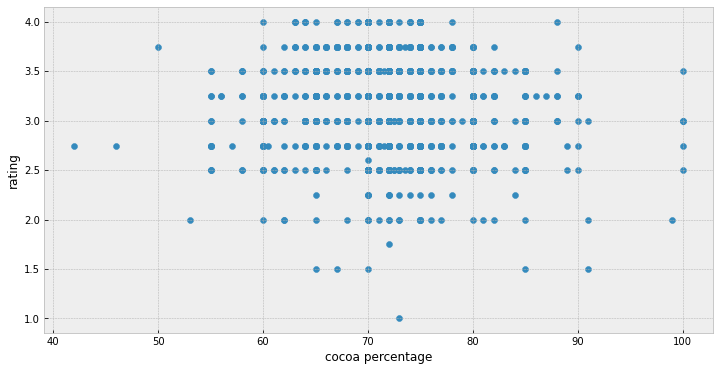

In [8]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage')
plt.ylabel('rating')
plt.scatter(df.cocoa_percent, df.rating)
plt.show()

Primjećujem da su najveće ocjene za otprilike 70% kakaa. Prvo raste, potom pada?

Ajmo razdvojiti podatke na one gdje je postotak čokolade veći i manji od medijana.

In [9]:
lt_70 = df[df.cocoa_percent < 70]
lt_70

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
6,6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,4.00,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN
25,25,1876,A. Morin,France,2016,Sao tome,Agua Grande,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,chocolatey,vegetal,NaN
26,26,2206,A. Morin,France,2018,Peru,Absolu,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,dairy,spice,cocoa
35,35,705,Adi aka Fijiana (Easy In Ltd),Fiji,2011,Fiji,Vanua Levu,60.0,2.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sweet,sublte strawberry,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2207,749,Zotter,Austria,2011,Congo,Congo,65.0,3.00,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,dairy,salt,caramel,NaN
2208,2208,875,Zotter,Austria,2012,Dominican republic,"Loma Los Pinos, Yacao region, D.R.",62.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,spice,caramel,toffee,salty
2211,2211,801,Zotter,Austria,2012,Blend,Amazonas Frucht,65.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,dairy,burnt caramel,coffee,NaN
2213,2213,883,Zotter,Austria,2012,Blend,"Indianer, Raw",58.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,smooth,spicy,floral,NaN


Prikažimo podatke o ocjenama, za postotak kakaa manji od 70%!

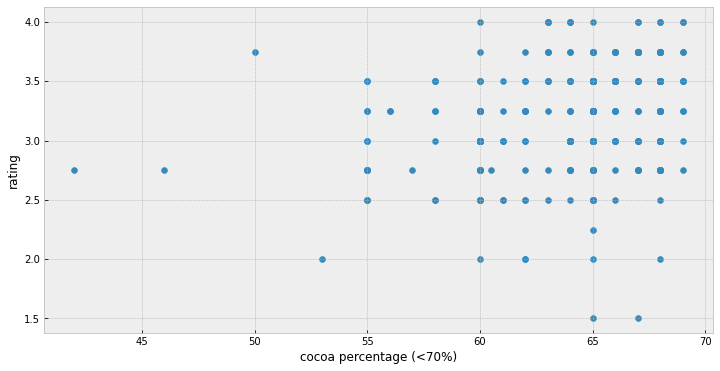

In [11]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (<70%)')
plt.ylabel('rating')
plt.scatter(lt_70.cocoa_percent, lt_70.rating)
plt.show()

In [16]:
reg = lm.LinearRegression()
reg.fit(lt_70[['cocoa_percent']], lt_70.rating)

LinearRegression()

In [19]:
print(reg.coef_)
print(reg.intercept_)

[0.03095997]
1.2080090462966357


Prikažimo podatke i linearni model za predikciju!

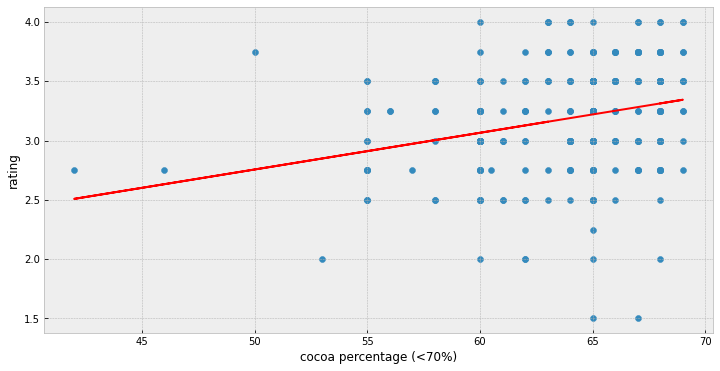

In [22]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (<70%)')
plt.ylabel('rating')
plt.scatter(lt_70.cocoa_percent, lt_70.rating)
plt.plot(lt_70.cocoa_percent, reg.predict(lt_70[['cocoa_percent']]), color = 'red')
plt.show()

In [10]:
ge_70 = df[df.cocoa_percent >= 70]
ge_70

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
5,5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.00,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


Prikažimo podatke o ocjenama, za postotak kakaa veći ili jednak 70%!

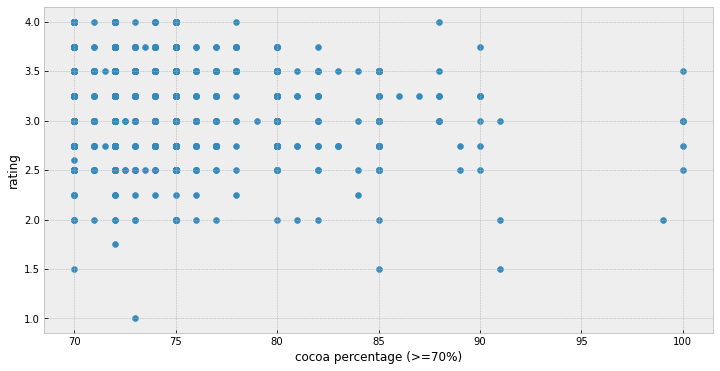

In [12]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (>=70%)')
plt.ylabel('rating')
plt.scatter(ge_70.cocoa_percent, ge_70.rating)
plt.show()

In [23]:
reg = lm.LinearRegression()
reg.fit(ge_70[['cocoa_percent']], ge_70.rating)

LinearRegression()

In [24]:
print(reg.coef_)
print(reg.intercept_)

[-0.01756972]
4.48045834397659


Prikažimo podatke i linearni model za predikciju!

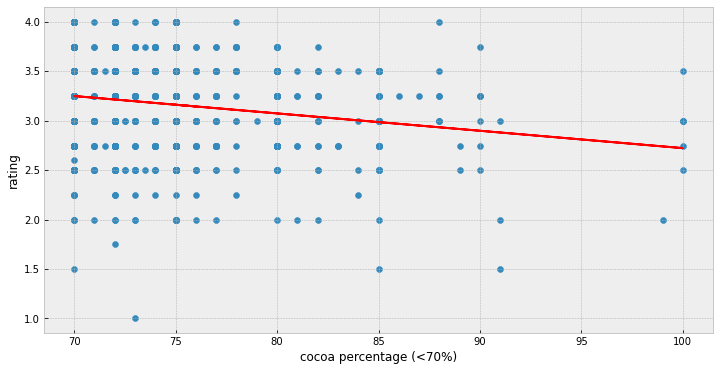

In [25]:
plt.figure(figsize=(12,6))
plt.xlabel('cocoa percentage (<70%)')
plt.ylabel('rating')
plt.scatter(ge_70.cocoa_percent, ge_70.rating)
plt.plot(ge_70.cocoa_percent, reg.predict(ge_70[['cocoa_percent']]), color = 'red')
plt.show()

Možemo li predvidjeti ocjenu iz broja sastojaka?

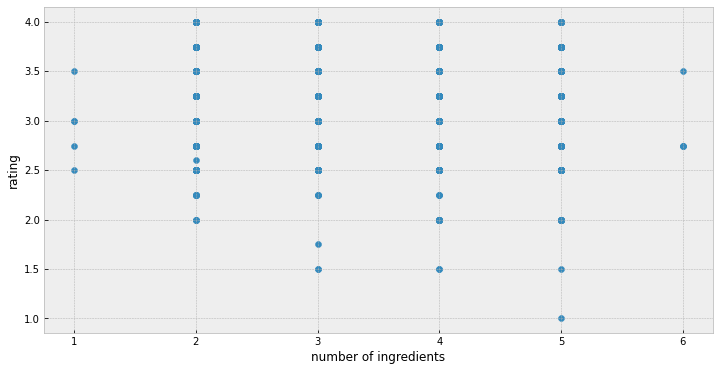

In [29]:
plt.figure(figsize=(12,6))
plt.xlabel('number of ingredients')
plt.ylabel('rating')
plt.scatter(df.counts_of_ingredients, df.rating)
plt.show()

In [27]:
reg = lm.LinearRegression()
reg.fit(df[['counts_of_ingredients']], df.rating)

LinearRegression()

In [28]:
print(reg.coef_)
print(reg.intercept_)

[-0.04430273]
3.3348358631905137


Prikažimo podatke i linearni model za predikciju!

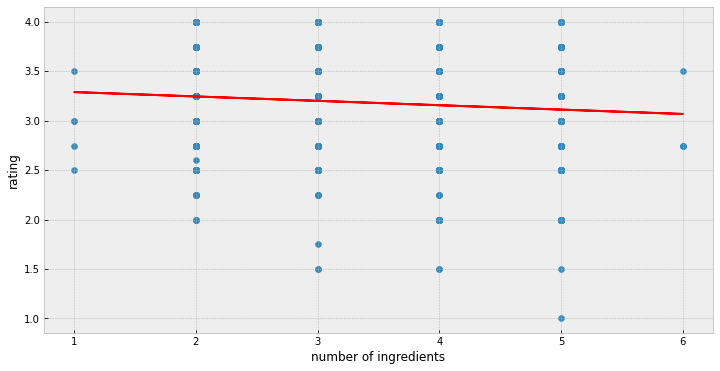

In [34]:
plt.figure(figsize=(12,6))
plt.xlabel('number of ingredients')
plt.ylabel('rating')
plt.scatter(df.counts_of_ingredients, df.rating)
plt.plot(df.counts_of_ingredients, reg.predict(df[['counts_of_ingredients']]), color = 'red')
plt.show()

Možemo li predvidjeti ocjenu iz godine ocjenjivanja?

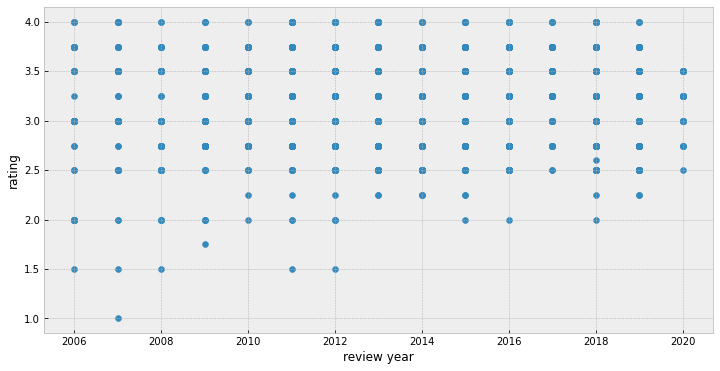

In [35]:
plt.figure(figsize=(12,6))
plt.xlabel('review year')
plt.ylabel('rating')
plt.scatter(df.review_date, df.rating)
plt.show()

In [36]:
reg = lm.LinearRegression()
reg.fit(df[['review_date']], df.rating)

LinearRegression()

In [37]:
print(reg.coef_)
print(reg.intercept_)

[0.00663084]
-10.15500456621695


Prikažimo podatke i linearni model za predikciju!

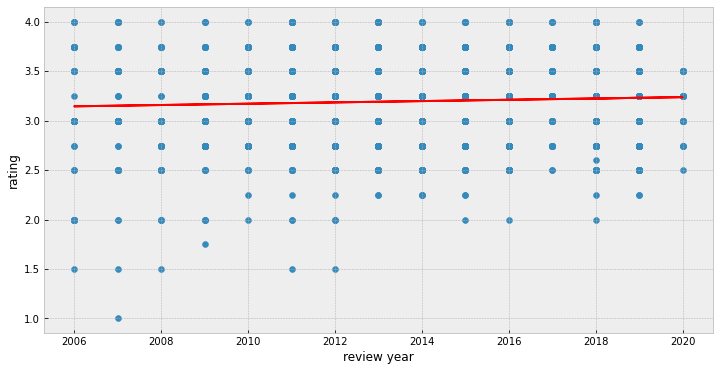

In [38]:
plt.figure(figsize=(12,6))
plt.xlabel('review year')
plt.ylabel('rating')
plt.scatter(df.review_date, df.rating)
plt.plot(df.review_date, reg.predict(df[['review_date']]), color = 'red')
plt.show()